### Inpainting demo

First, loading the esd-x model to verify erasure of van gogh concept

In [1]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from utils import load_model_inpaint_pipeline, generate_inpainting_images_with_mask_overlay,  display_images, calculate_clip_score

/share/u/kevin/miniconda3/envs/asdf_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


✅ ESD-X model loaded successfully!


100%|██████████| 50/50 [00:01<00:00, 25.15it/s]


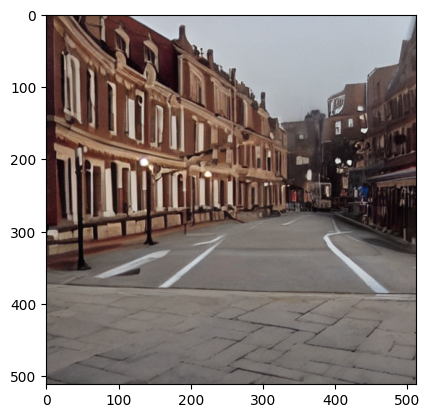

In [2]:
# Check for GPU availability (MPS for Apple Silicon or CUDA for NVIDIA GPUs)
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the ESD-X model from Hugging Face
model_id = "kevinlu4588/esd-x-van-gogh"

pipeline = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device != "cpu" else torch.float32,  # Use FP16 for GPU, FP32 for CPU
    use_safetensors=True
).to(device)

print("✅ ESD-X model loaded successfully!")

# Sample text prompt for generation
prompt = "Starry Night By Van Gogh"

# Inference
with torch.inference_mode():
    image = pipeline(prompt).images[0]

# Display the generated image
plt.imshow(image)


## Inpainting on starry night with erased Van Gogh Model

100%|██████████| 50/50 [00:01<00:00, 25.84it/s]


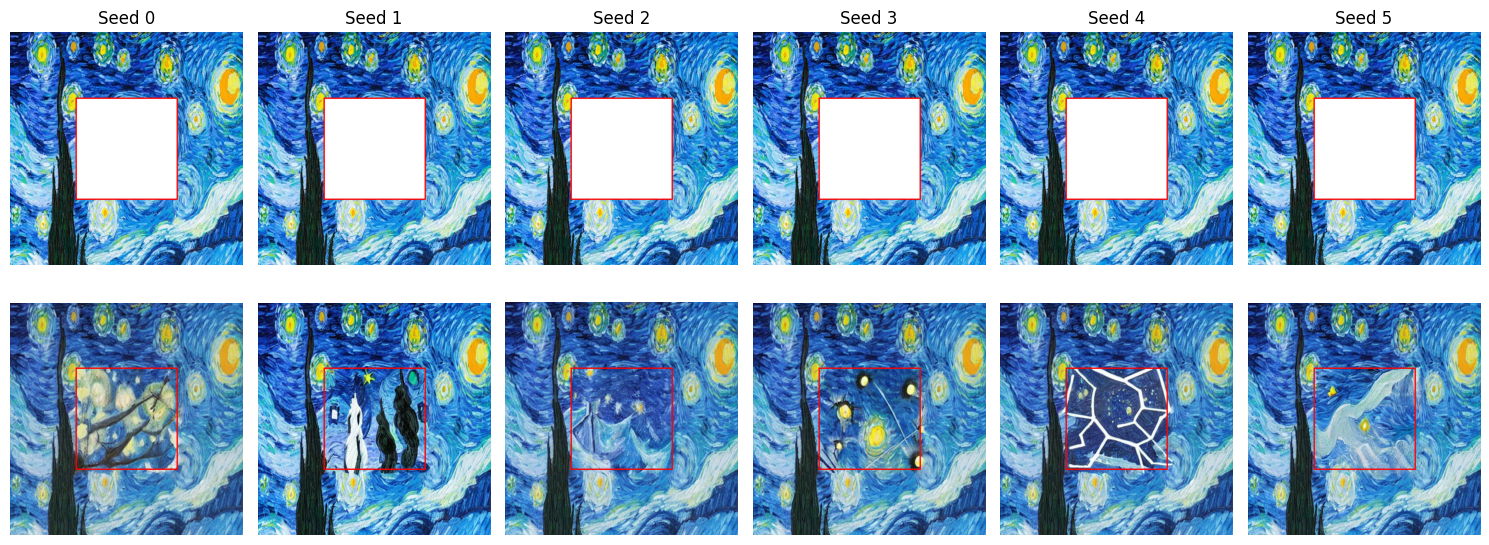

In [3]:
foundation_pipeline = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipeline = load_model_inpaint_pipeline("kevinlu4588/esd-x-van-gogh", foundation_pipeline).to("cuda")
pipeline.safety_checker = None
seeds = [20, 2440, 1440, 1000, 3500, 4000]
prompt = "Starry Night By Van Gogh"

images, base_with_mask = generate_inpainting_images_with_mask_overlay("/share/u/kevin/DiffusionConceptErasure/center_square_mask.png", "/share/u/kevin/DiffusionConceptErasure/starry night.webp", pipeline, prompt, seeds)
display_images(images, base_with_mask)

## Calculating CLIP Scores and displaying best image

Best CLIP Score inpaint:  21.462993621826172


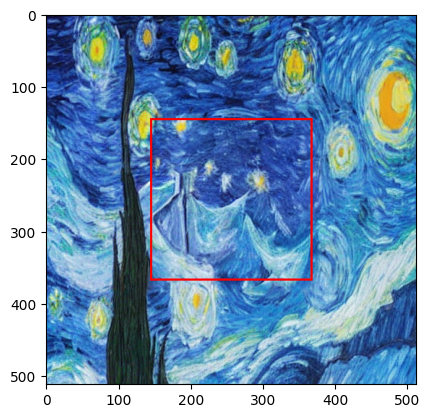

In [4]:
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
model = model.to("cuda")  # Move the model to CUDA
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
best_image, best_score = calculate_clip_score(images, "airliner", "/share/u/kevin/DiffusionConceptErasure/center_square_mask.png", model, processor)
plt.imshow(best_image)
print("Best CLIP Score inpaint: ", best_score.item())